In [56]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from datetime import datetime, date, timedelta
import yfinance as yfin
yfin.pdr_override()


# Graph
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import matplotlib.pyplot as plt
#import seaborn as sns


import pandas_montecarlo

# Models
#import pymc3 as pm


import warnings

In [57]:
pd.set_option('display.float_format', lambda x: f'{x:,.6f}')
plt.rcParams["figure.figsize"] = (10,6)

warnings.filterwarnings("ignore")

# Option Pricing Instructions Option Pricing Instructions
- Download the pandas-montecarlo package from Github
- Duplicate the 'Spy' simulation 
- Substitute data for one of the assets in your portfolio and run the simulation for that asset
- Using the simulation price a European option for that asset.
- Post your results here.
- Upload your code to GitHub Classroom
- Summarize your results in a thread on the discussion board.


# Variables

In [58]:
start_date = datetime(2022, 1, 1)
purchase_date = datetime(2023, 9, 11)
split_date = datetime(2023,8,24)
today = datetime(2023,11,18)

RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)


# Load Portfolio Returns

For this analysis I will focus on the following AI stock ARKK:

- ARKK - ARK Innovation ETF

AI is a sector that we are targeting as part of the investment strategy so focusing these stock is consistent with the broader portfolio strategy. 

In [59]:
sp_list = ['ARKK','EXAS','NVTA','PATH','TWLO']
#sp_list = ['TWLO']

#df = pdr.get_data_yahoo(sp_list, start=purchase_date, end=today)[['Adj Close']]
df = pdr.get_data_yahoo(sp_list)[['Adj Close']]
df.columns = sp_list
return_df = df.pct_change().fillna(0)
print('return_df: ',return_df.shape)

[*********************100%%**********************]  5 of 5 completed
return_df:  (5746, 5)


In [60]:
return_df.columns

Index(['ARKK', 'EXAS', 'NVTA', 'PATH', 'TWLO'], dtype='object')

In [61]:
return_df

,ARKK,EXAS,NVTA,PATH,TWLO
Date,,,,,
2001-02-01,0.000000,0.000000,0.000000,0.000000,0.000000
2001-02-02,0.000000,-0.041667,0.000000,0.000000,0.000000
2001-02-05,0.000000,-0.021739,0.000000,0.000000,0.000000
2001-02-06,0.000000,-0.004444,0.000000,0.000000,0.000000
2001-02-07,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2023-11-28,0.027503,-0.012914,-0.044944,0.025946,0.035800
2023-11-29,0.004283,0.001385,0.013726,0.046892,0.015822
2023-11-30,-0.016844,-0.016293,-0.017408,-0.005536,-0.021926


# Monte Carlo Simulator for Pandas Series

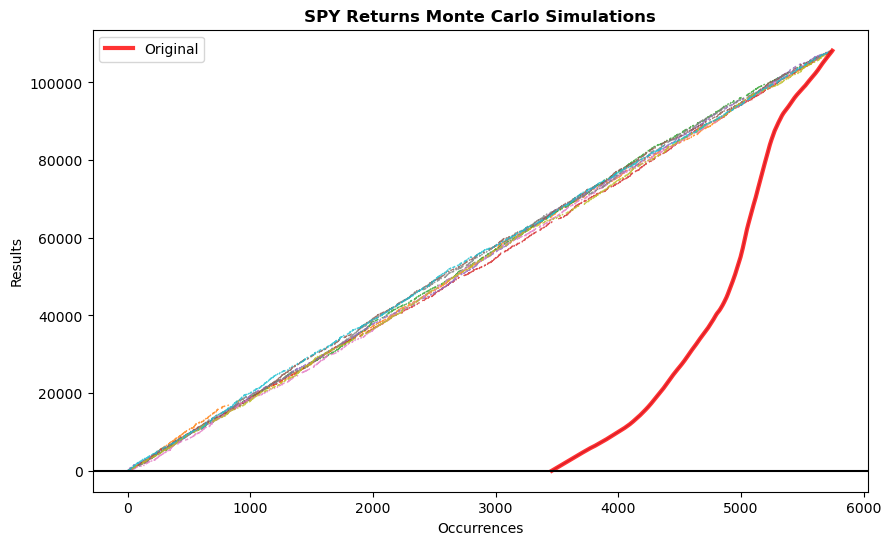

In [66]:
mc = df['ARKK'].montecarlo(sims=10, bust=-.1, goal=10)
mc.plot(title="SPY Returns Monte Carlo Simulations")  # optional: , figsize=(x, y)

# Show test stats

In [63]:
print(mc.stats)

{'min': 238718.25988578796, 'max': 238718.25988578796, 'mean': 238718.25988578796, 'median': 238718.25988578796, 'std': 0.0, 'maxdd': nan, 'bust': 0.0, 'goal': 0.33}
